In [70]:
import pandas as pd
from tpot import TPOTClassifier, TPOTRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import plotly as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df=pd.read_csv("microbes.csv")

In [72]:
df.head()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [73]:
ds=df.loc[3]

In [74]:
ds

Unnamed: 0                 3
Solidity                10.1
Eccentricity            17.9
EquivDiameter           7.29
Extrema                 11.1
FilledArea              1.47
Extent                   6.3
Orientation             9.94
EulerNumber             21.9
BoundingBox1            8.81
BoundingBox2            10.7
BoundingBox3            3.34
BoundingBox4            3.63
ConvexHull1             8.93
ConvexHull2             8.93
ConvexHull3              8.9
ConvexHull4             8.88
MajorAxisLength         2.04
MinorAxisLength         2.12
Perimeter              0.715
ConvexArea             0.371
Centroid1               10.3
Centroid2               12.0
Area                    2.34
raddi                   7.99
microorganisms     Spirogyra
Name: 3, dtype: object

In [75]:
ds

Unnamed: 0                 3
Solidity                10.1
Eccentricity            17.9
EquivDiameter           7.29
Extrema                 11.1
FilledArea              1.47
Extent                   6.3
Orientation             9.94
EulerNumber             21.9
BoundingBox1            8.81
BoundingBox2            10.7
BoundingBox3            3.34
BoundingBox4            3.63
ConvexHull1             8.93
ConvexHull2             8.93
ConvexHull3              8.9
ConvexHull4             8.88
MajorAxisLength         2.04
MinorAxisLength         2.12
Perimeter              0.715
ConvexArea             0.371
Centroid1               10.3
Centroid2               12.0
Area                    2.34
raddi                   7.99
microorganisms     Spirogyra
Name: 3, dtype: object

In [76]:
df.drop('Unnamed: 0', axis=1, inplace=True)

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,...,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [78]:
df['microorganisms'].unique()

array(['Spirogyra', 'Volvox', 'Pithophora', 'Yeast', 'Raizopus',
       'Penicillum', 'Aspergillus sp', 'Protozoa', 'Diatom', 'Ulothrix'],
      dtype=object)

In [79]:
df.duplicated().sum()

np.int64(25653)

In [80]:
def wisker(col):
    q1,q3=np.percentile(col,(25,75))
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [81]:
df.columns

Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi',
       'microorganisms'],
      dtype='object')

In [82]:
for i in['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i] < lw,lw,df[i])
    df[i]=np.where(df[i] > uw,uw,df[i])

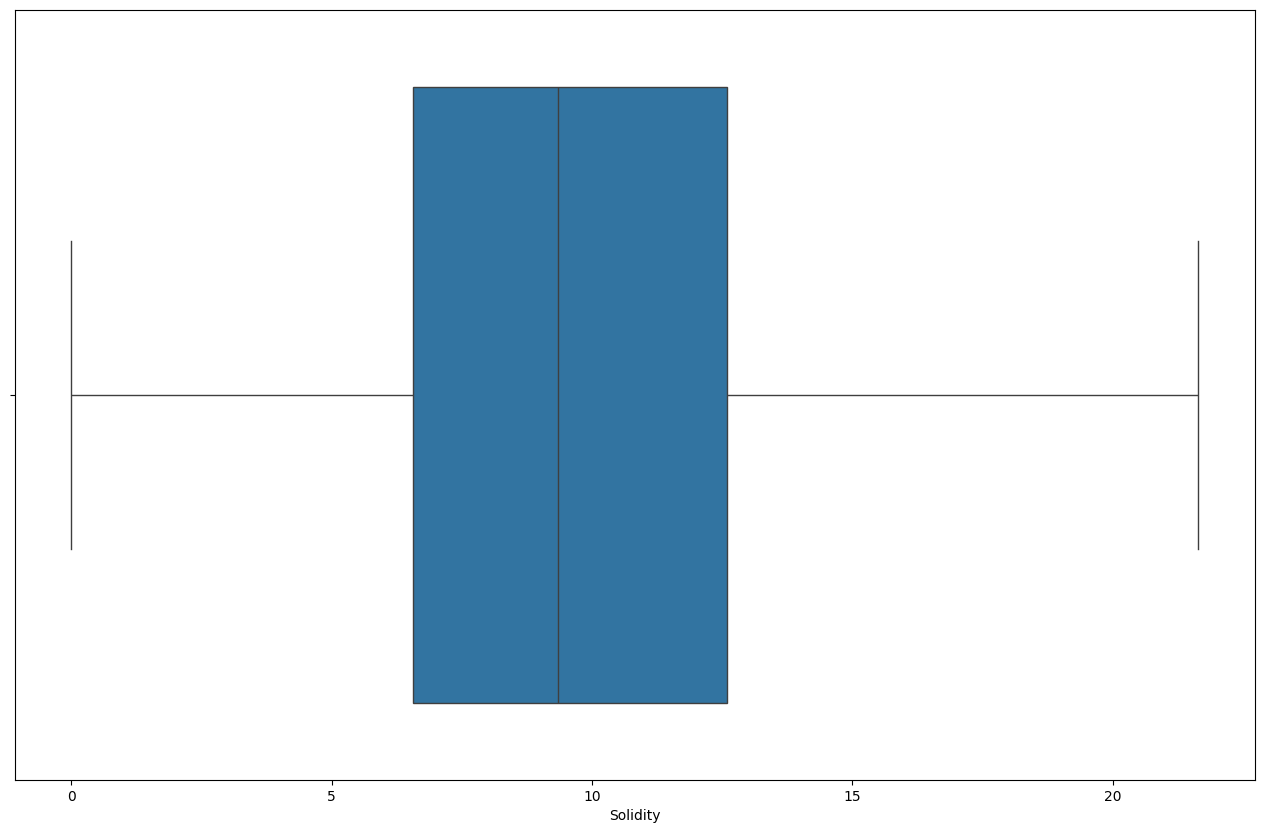

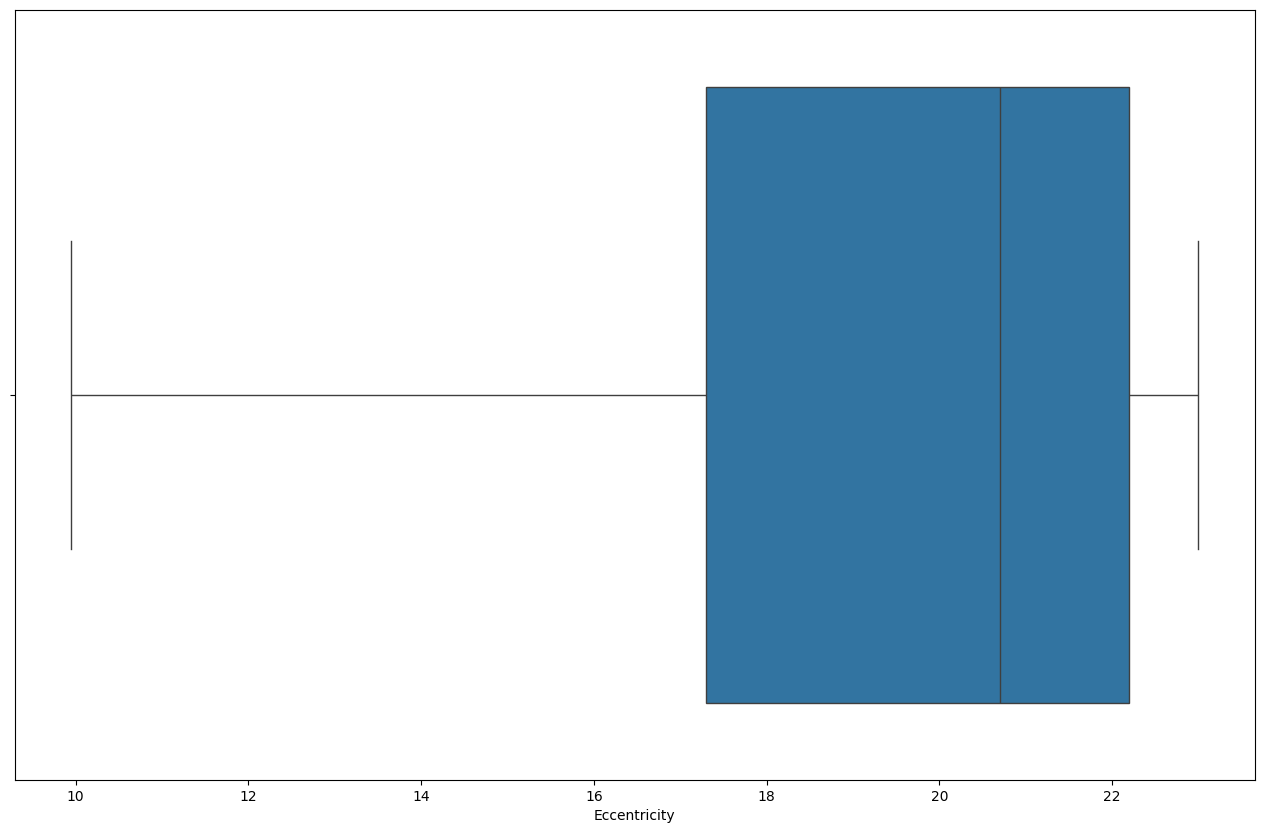

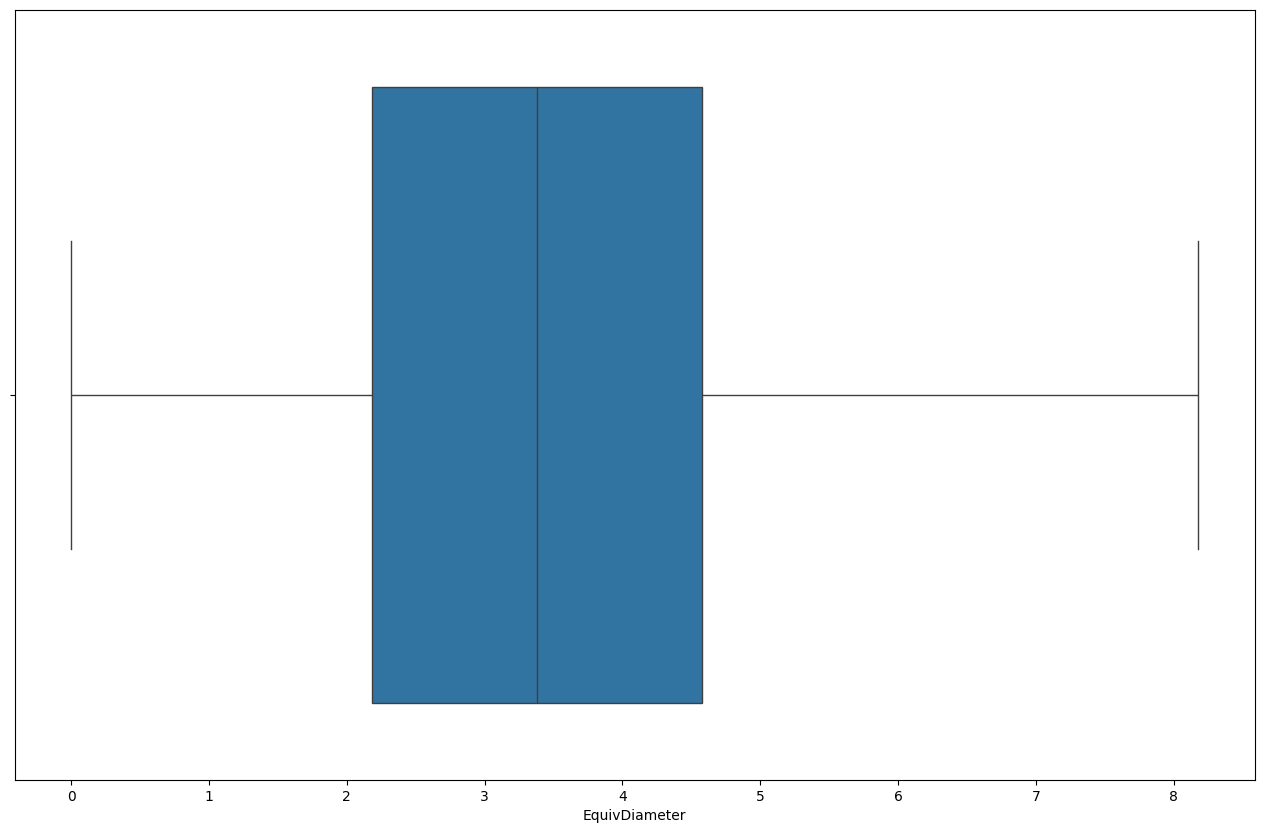

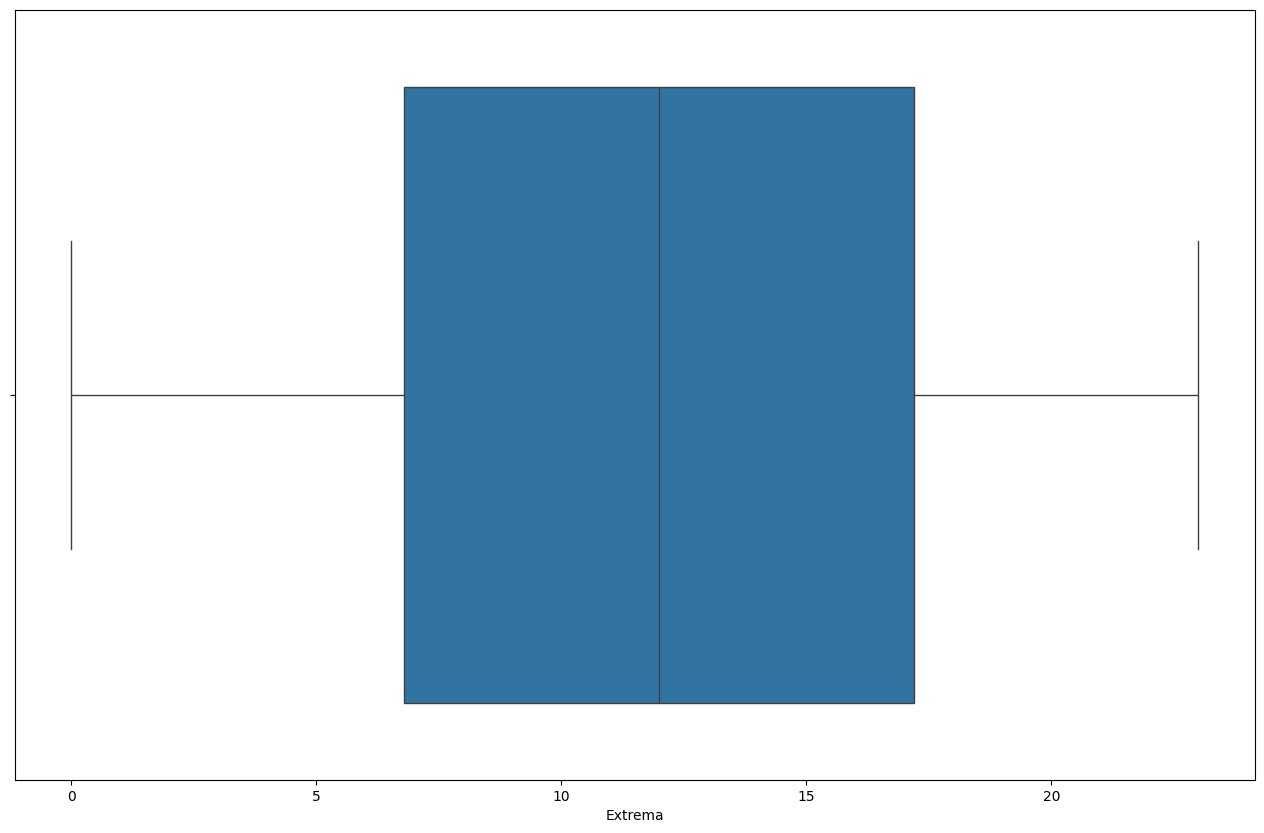

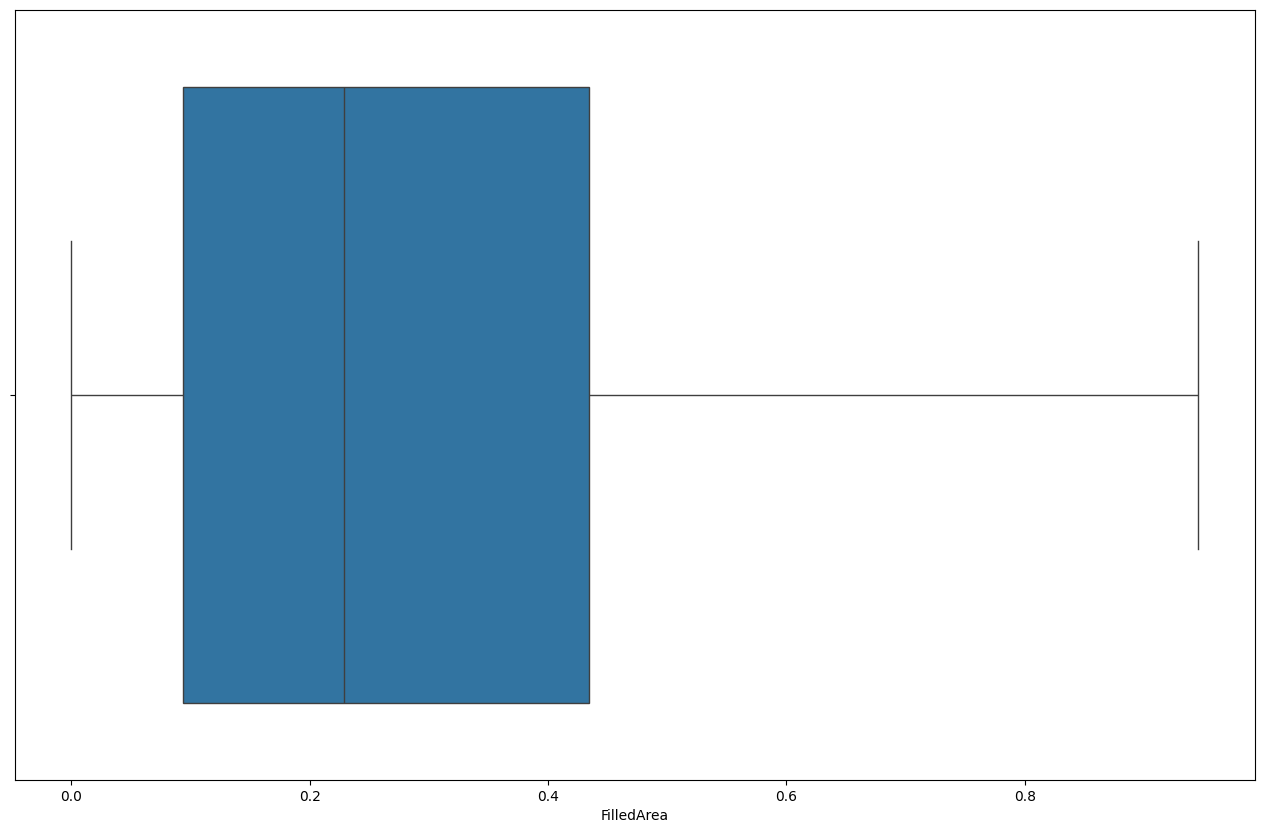

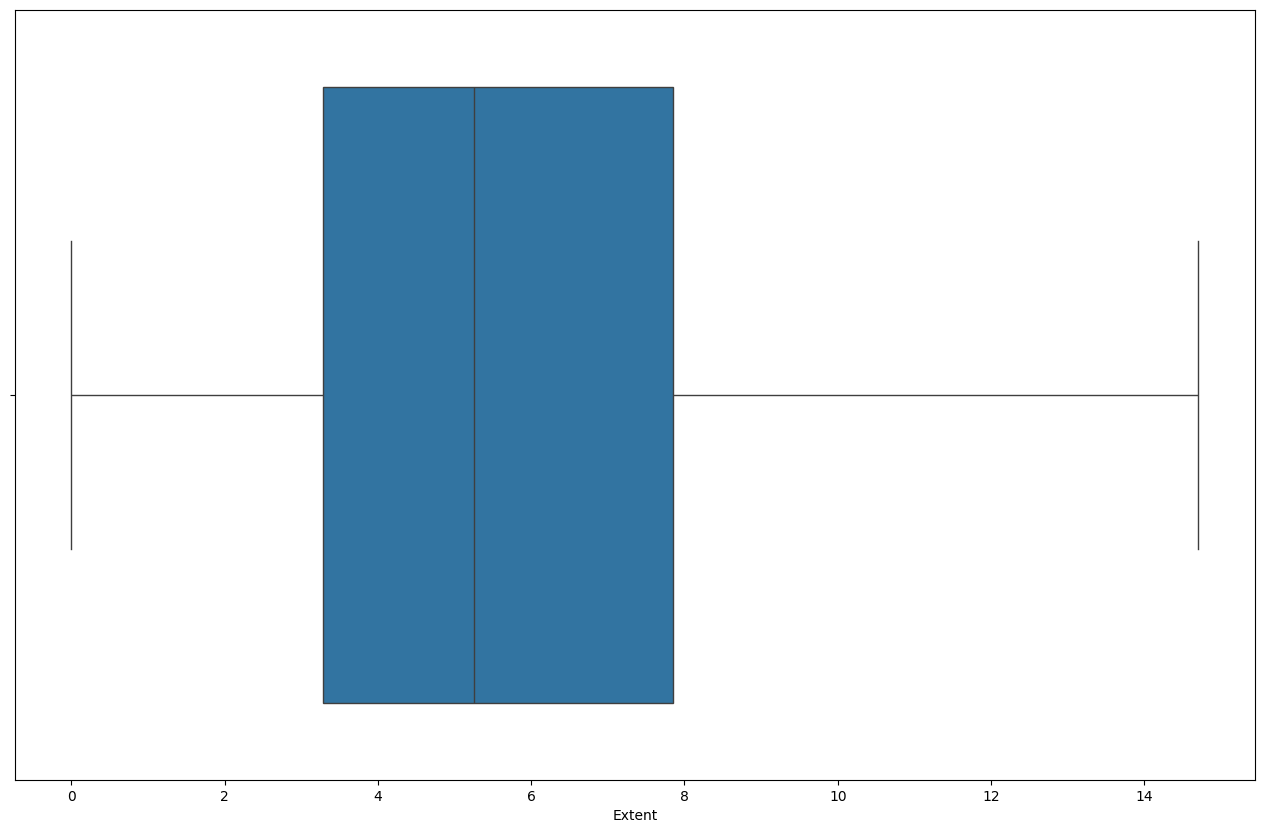

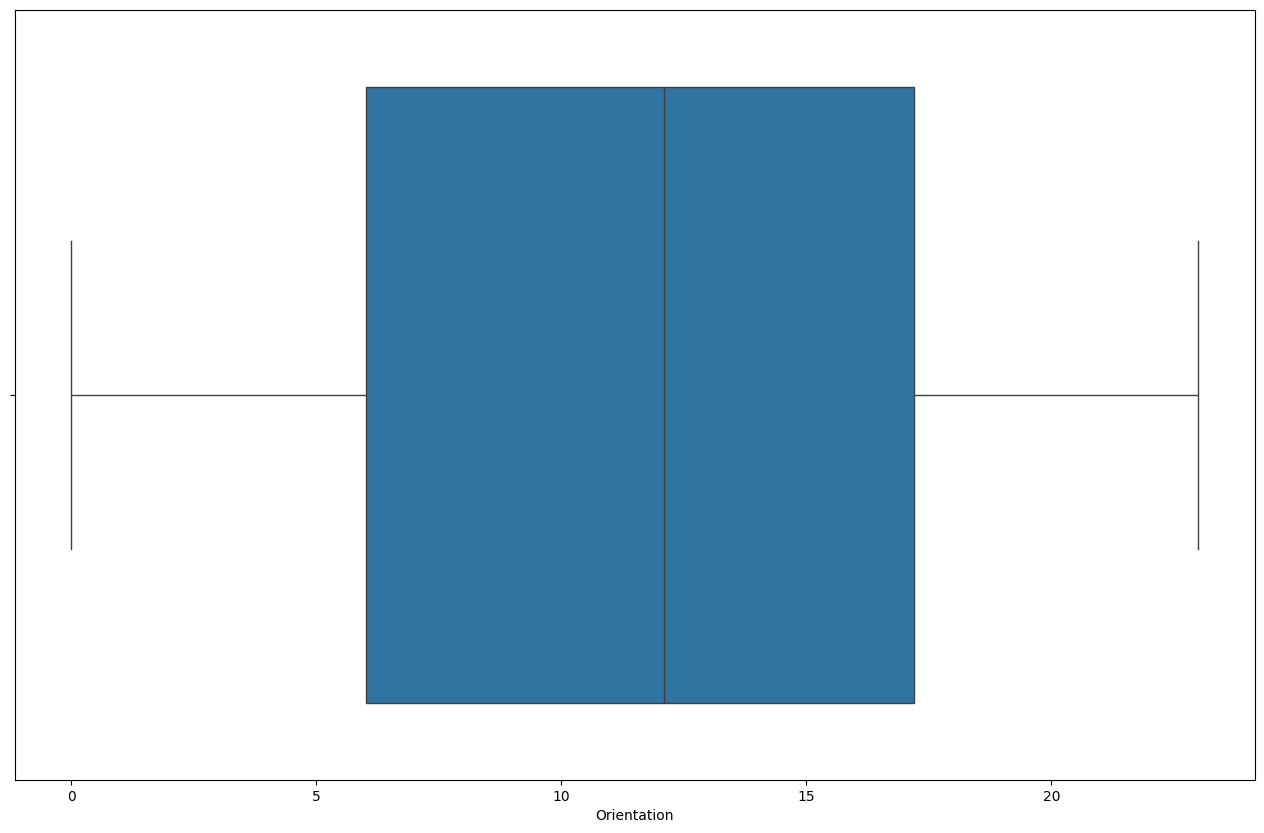

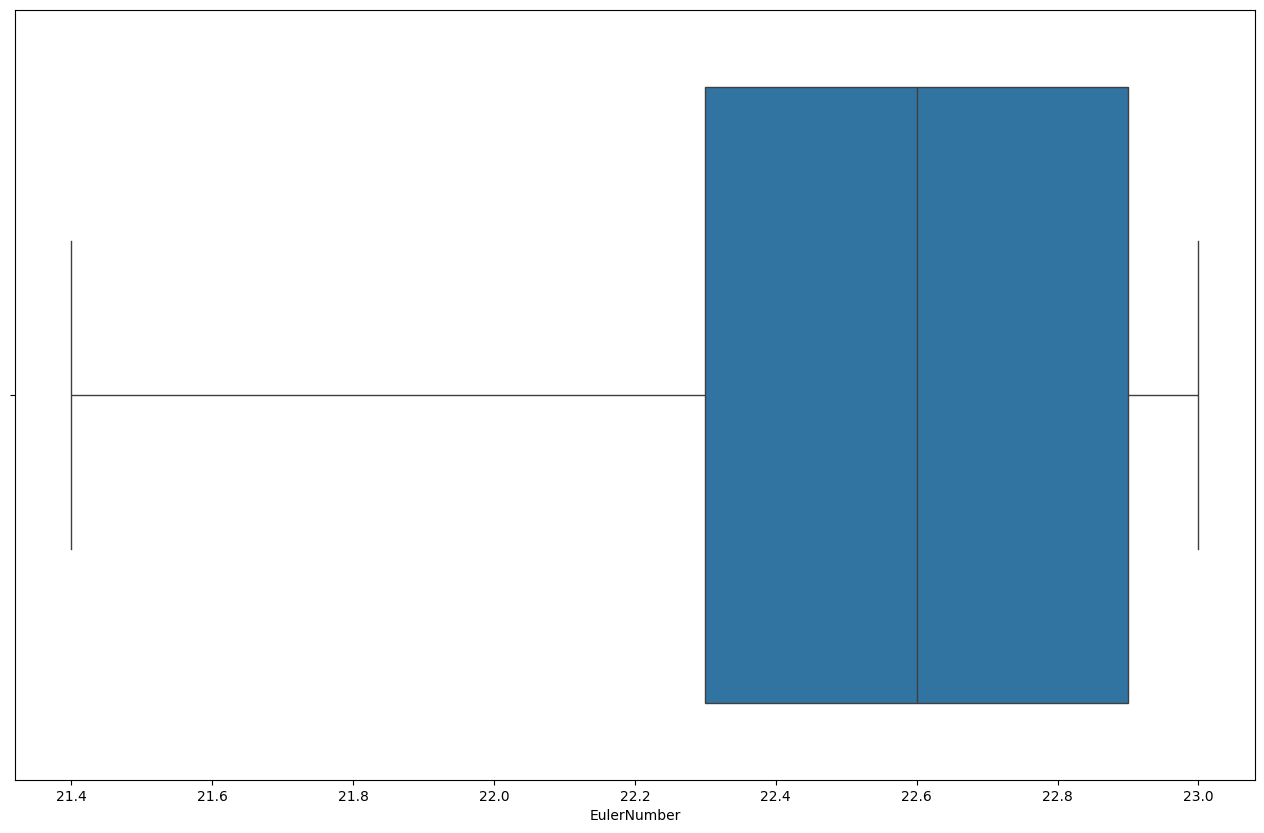

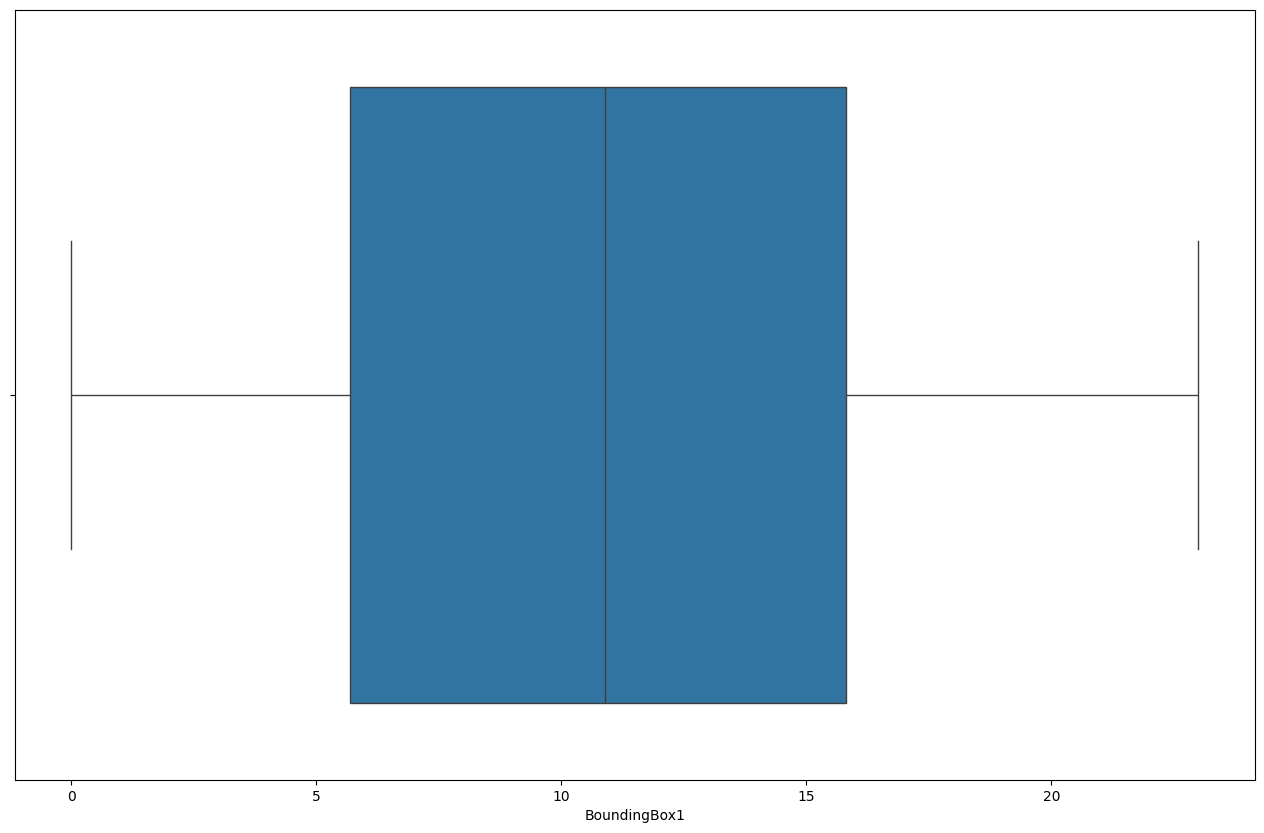

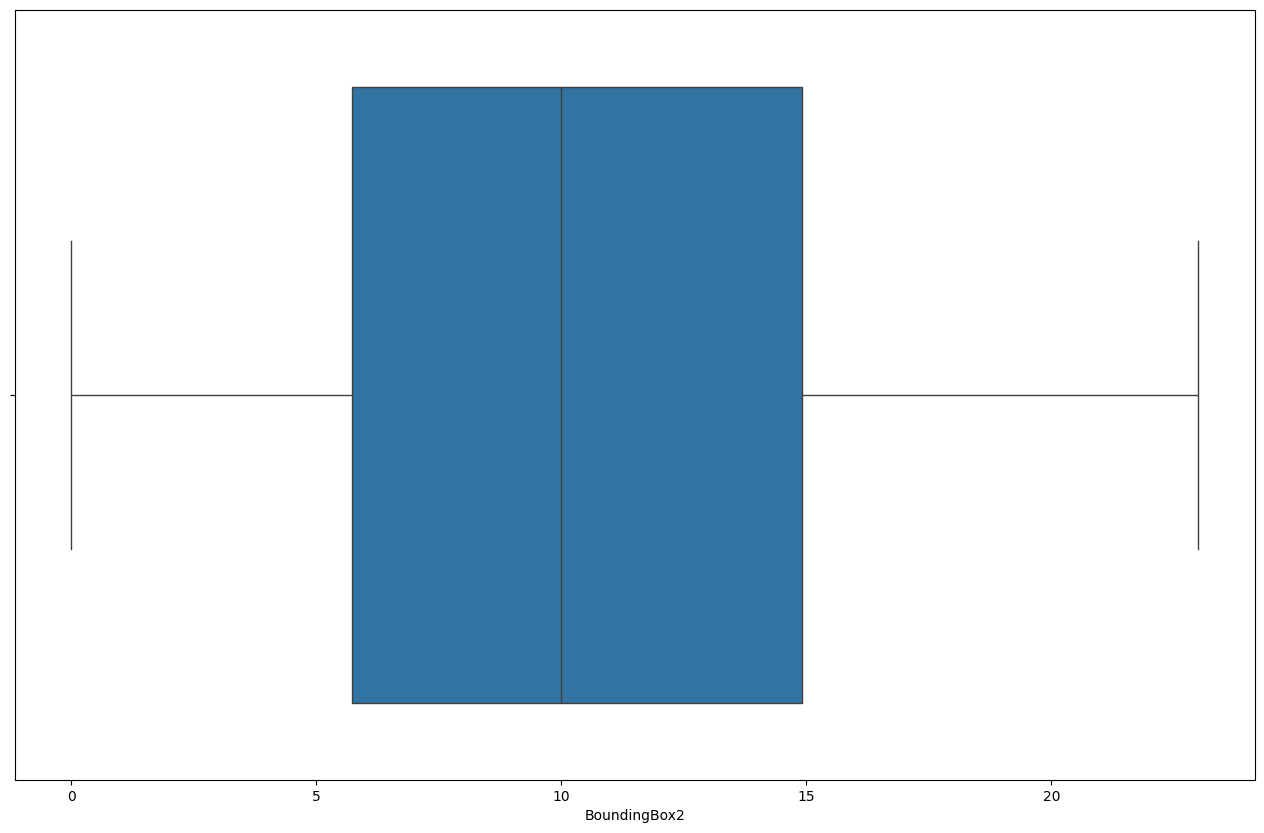

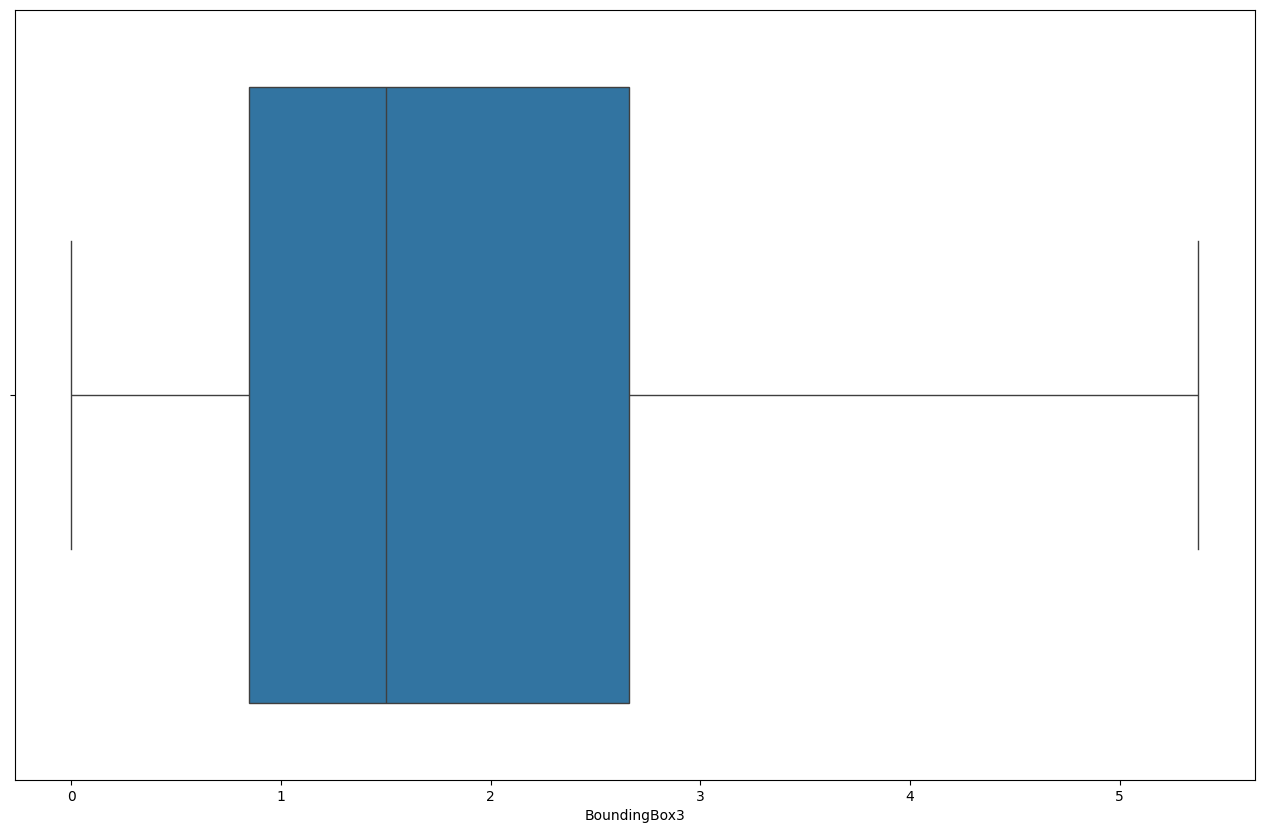

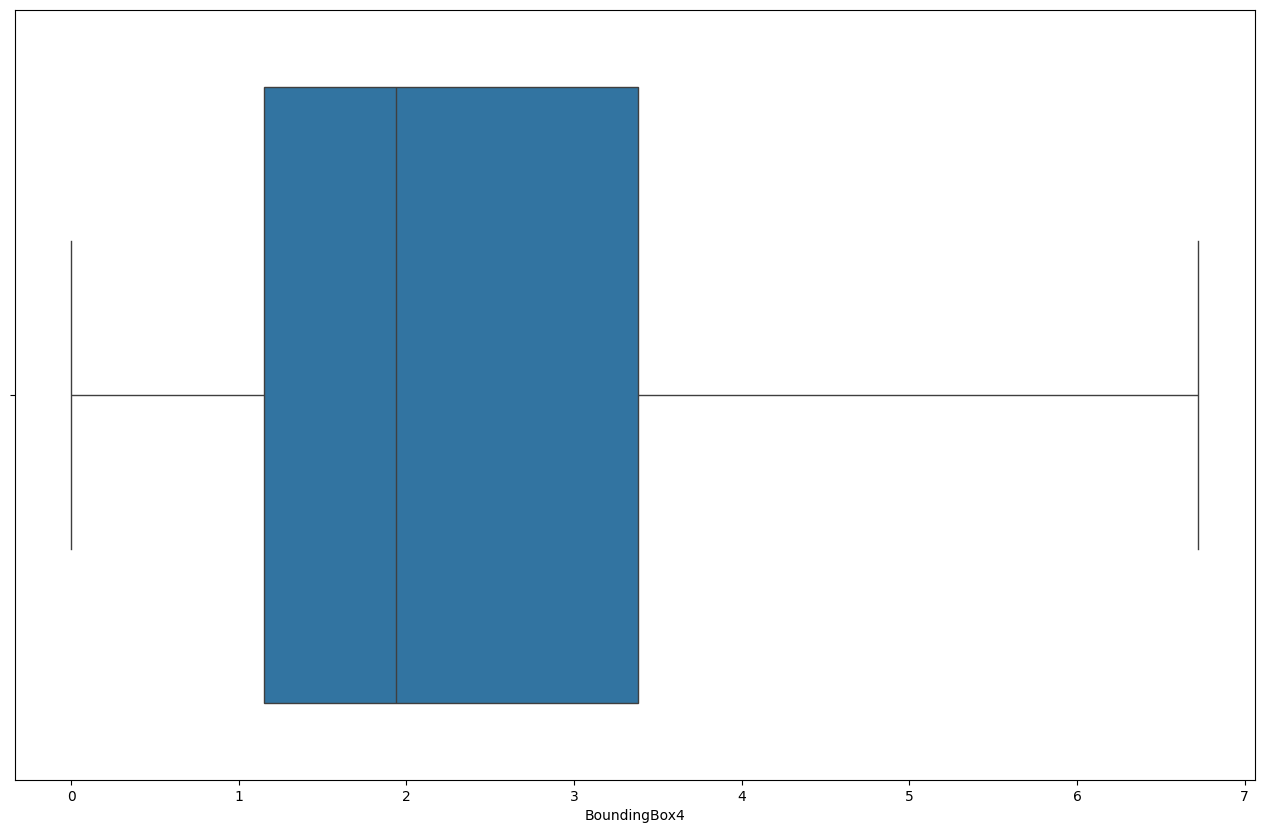

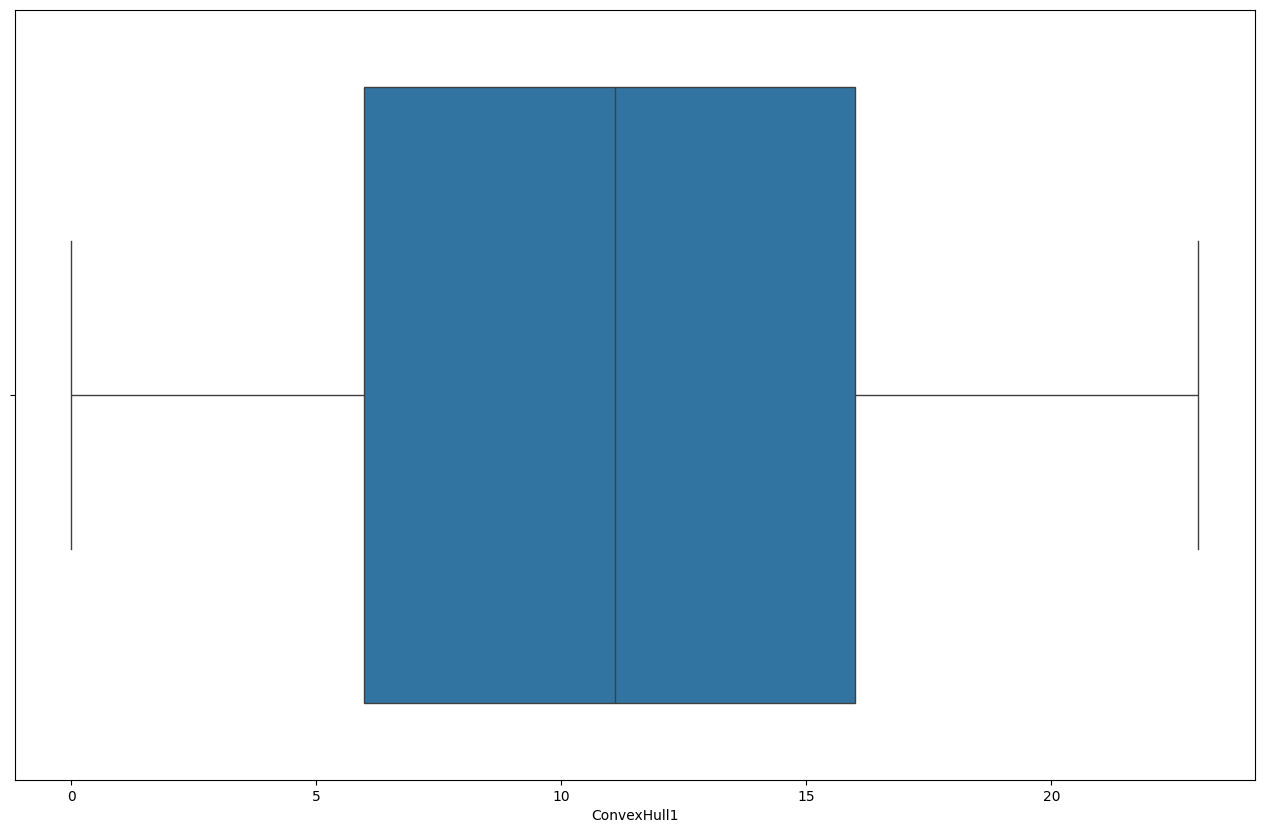

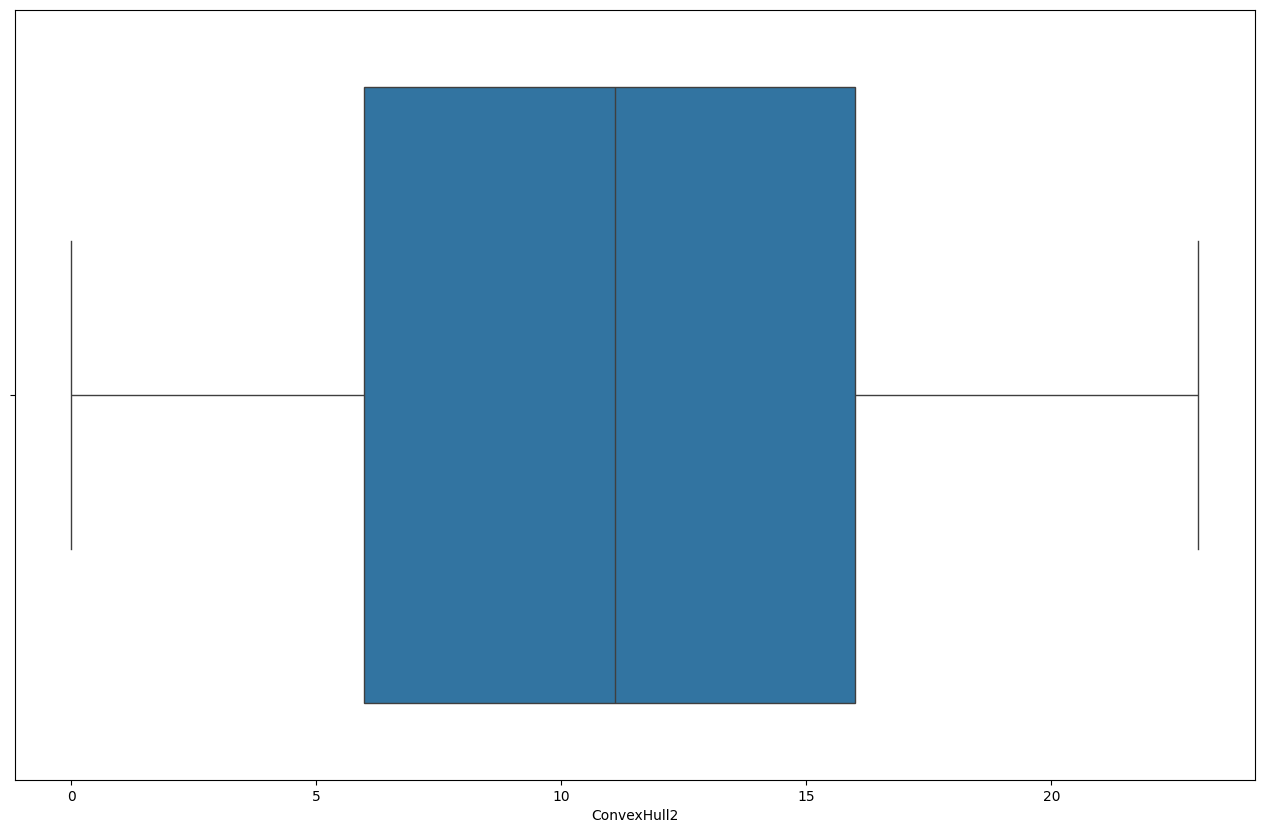

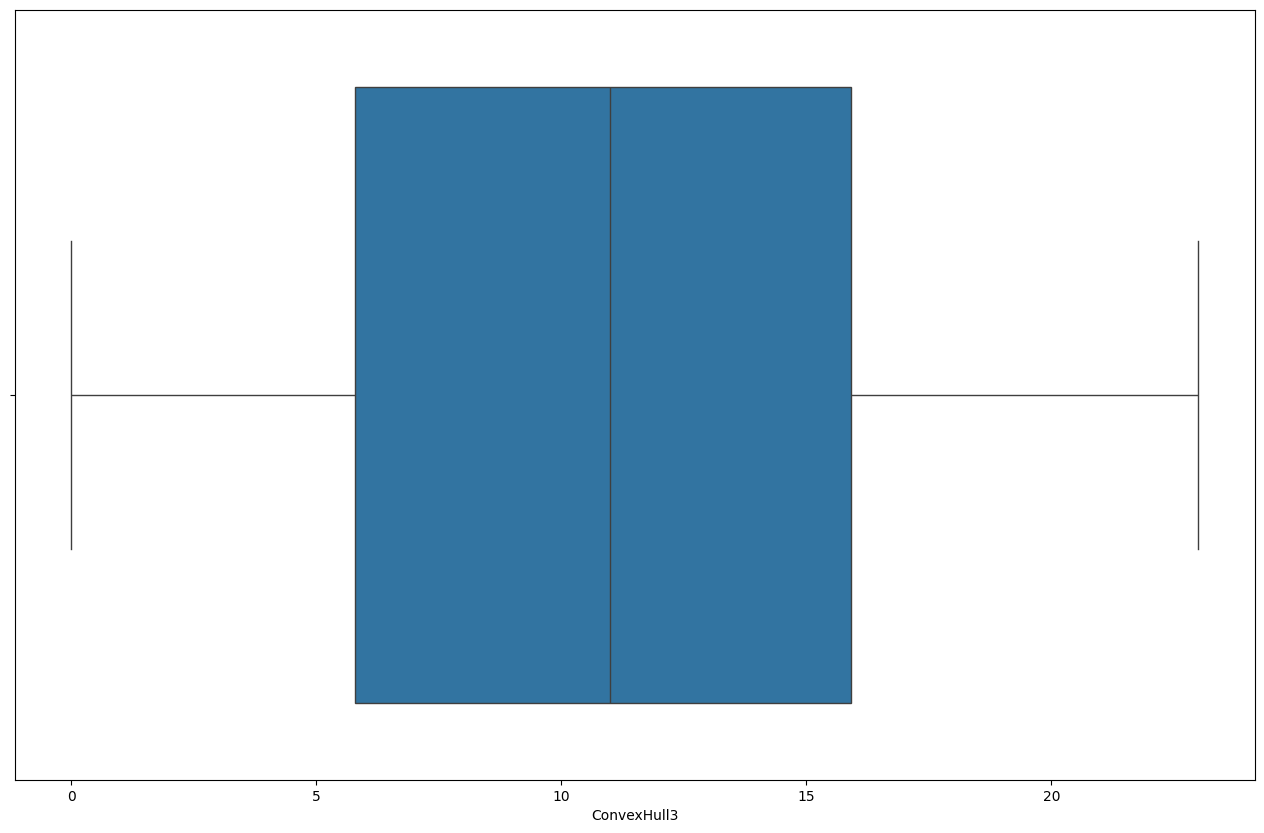

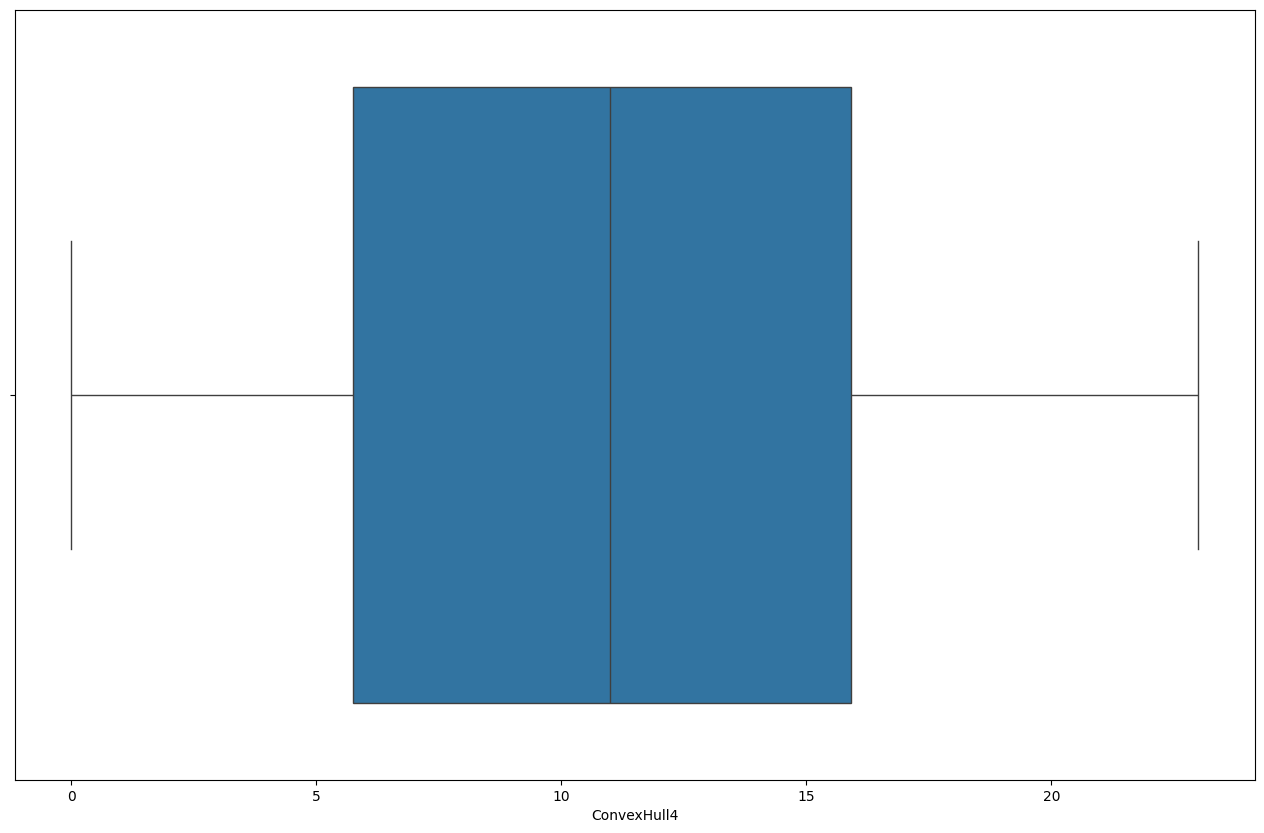

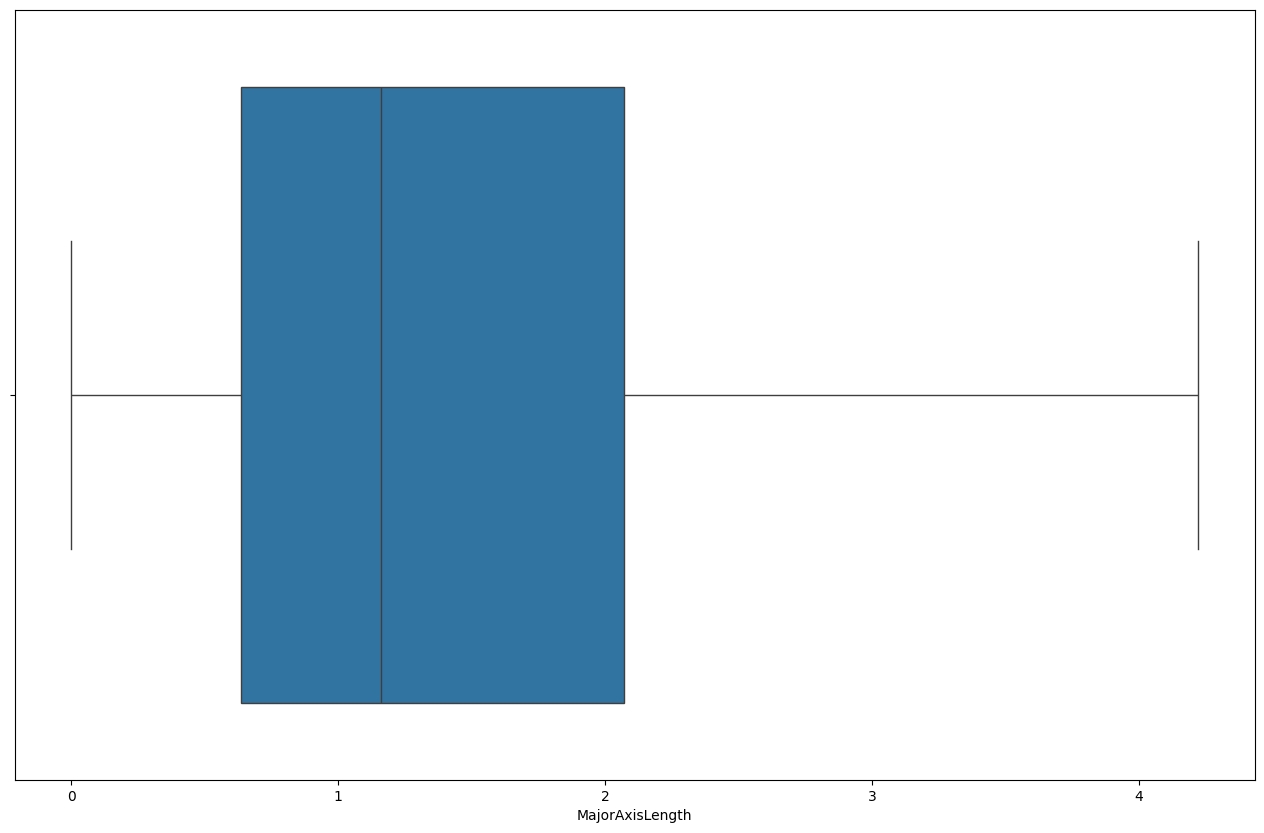

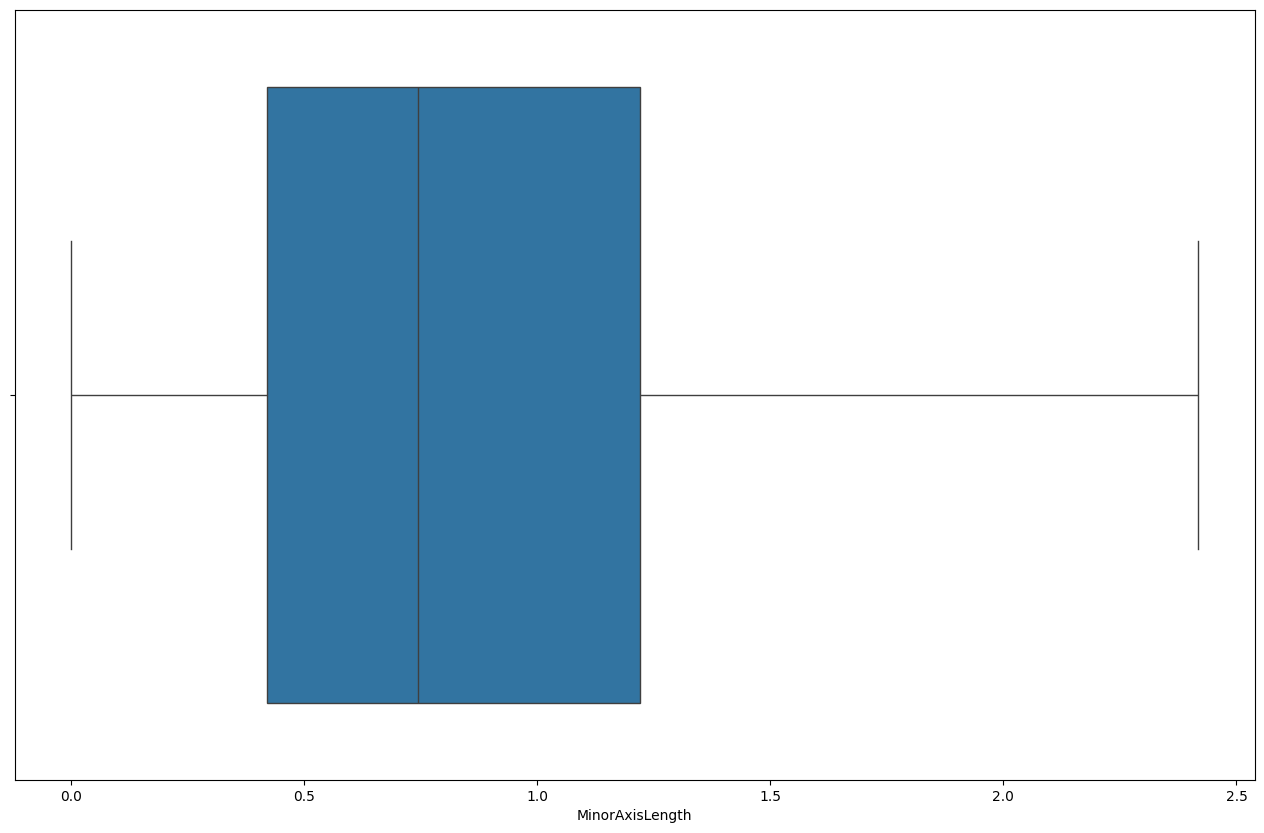

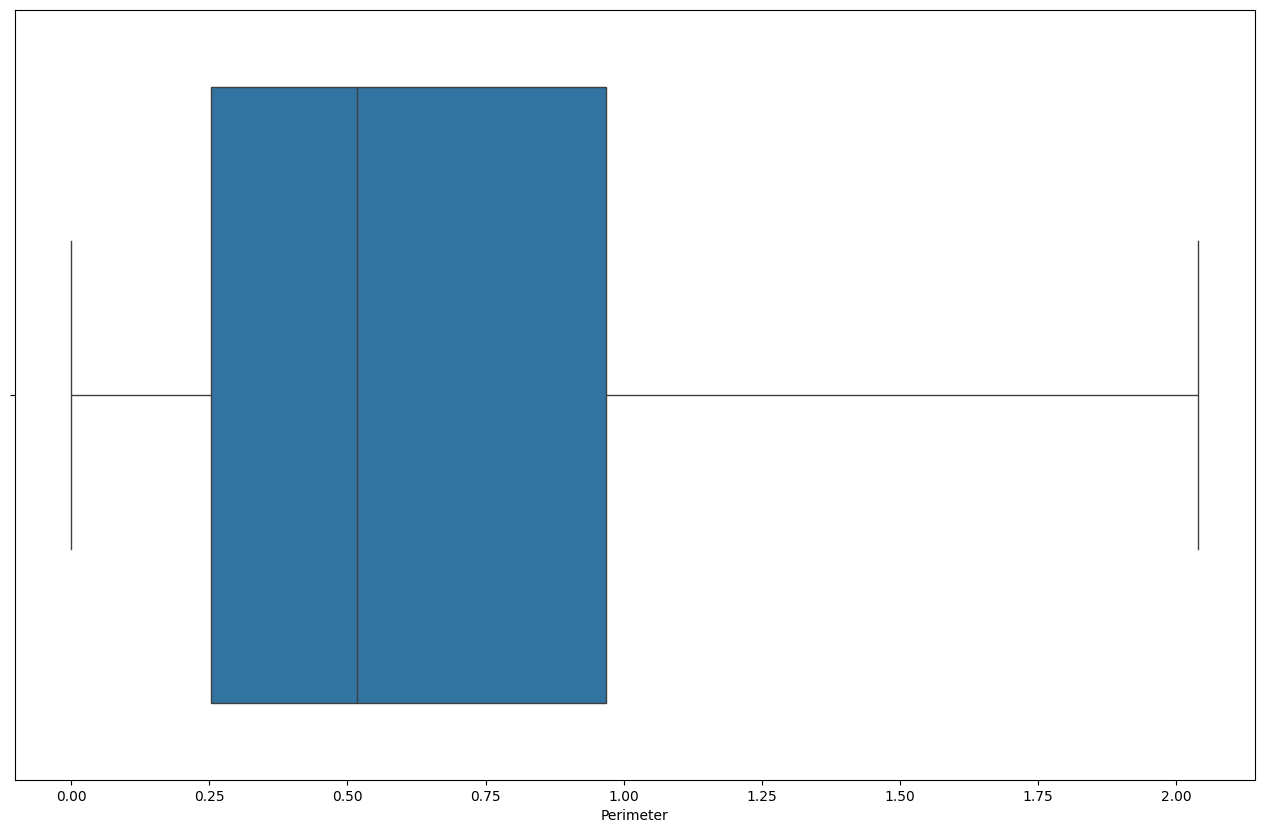

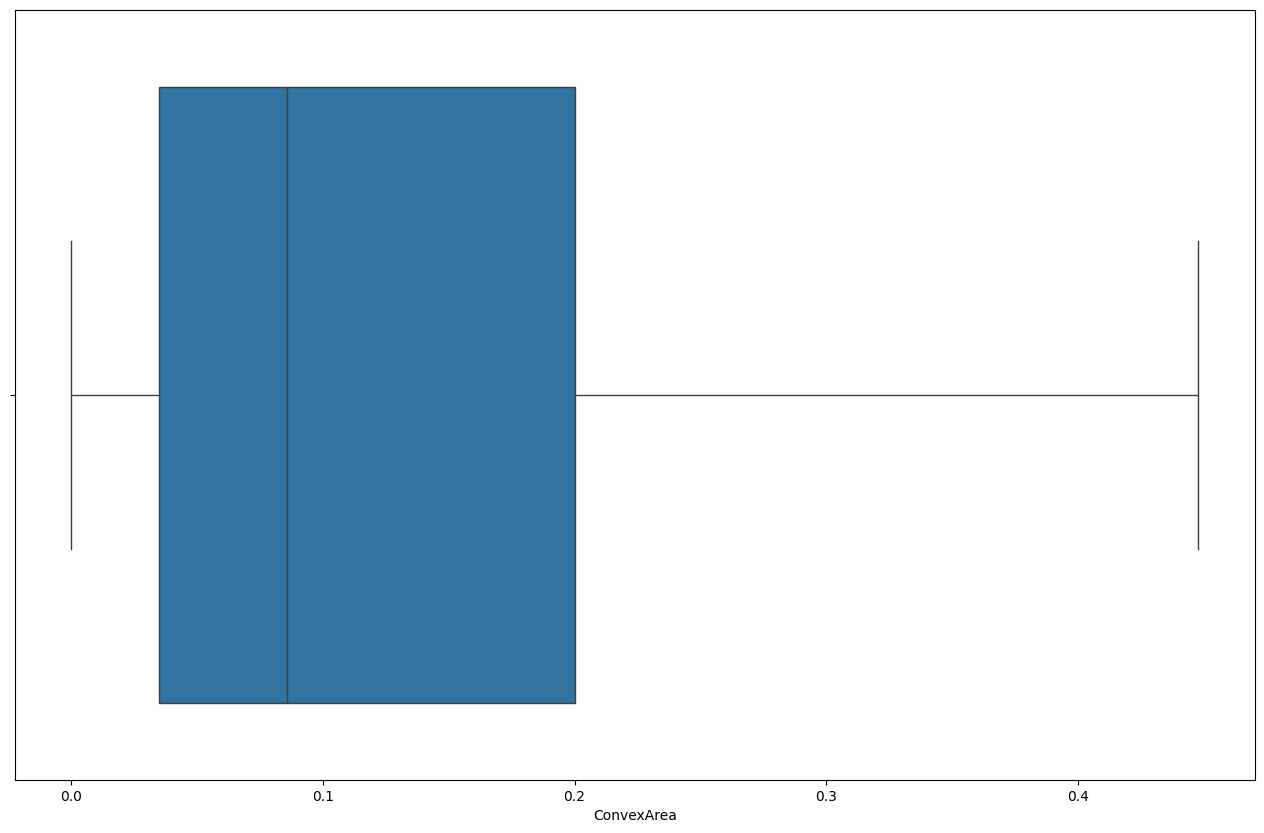

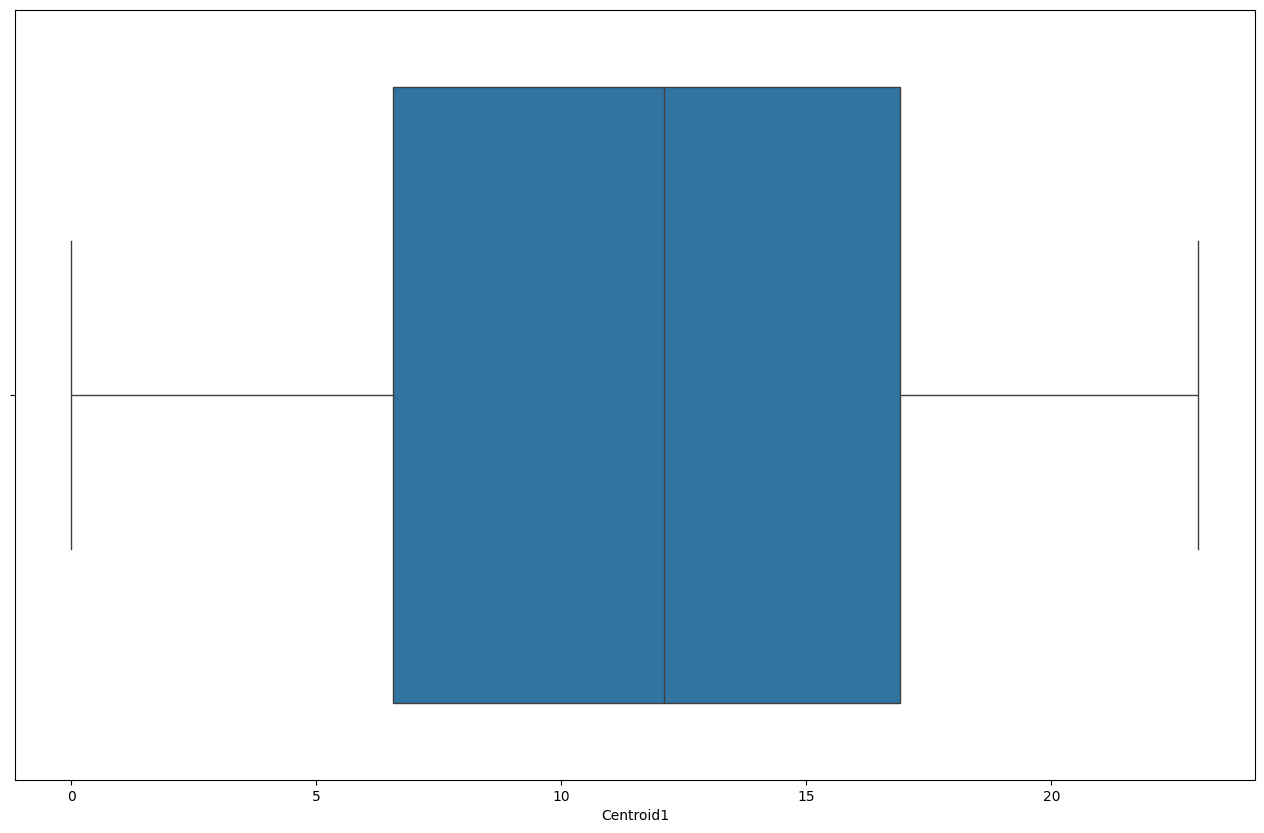

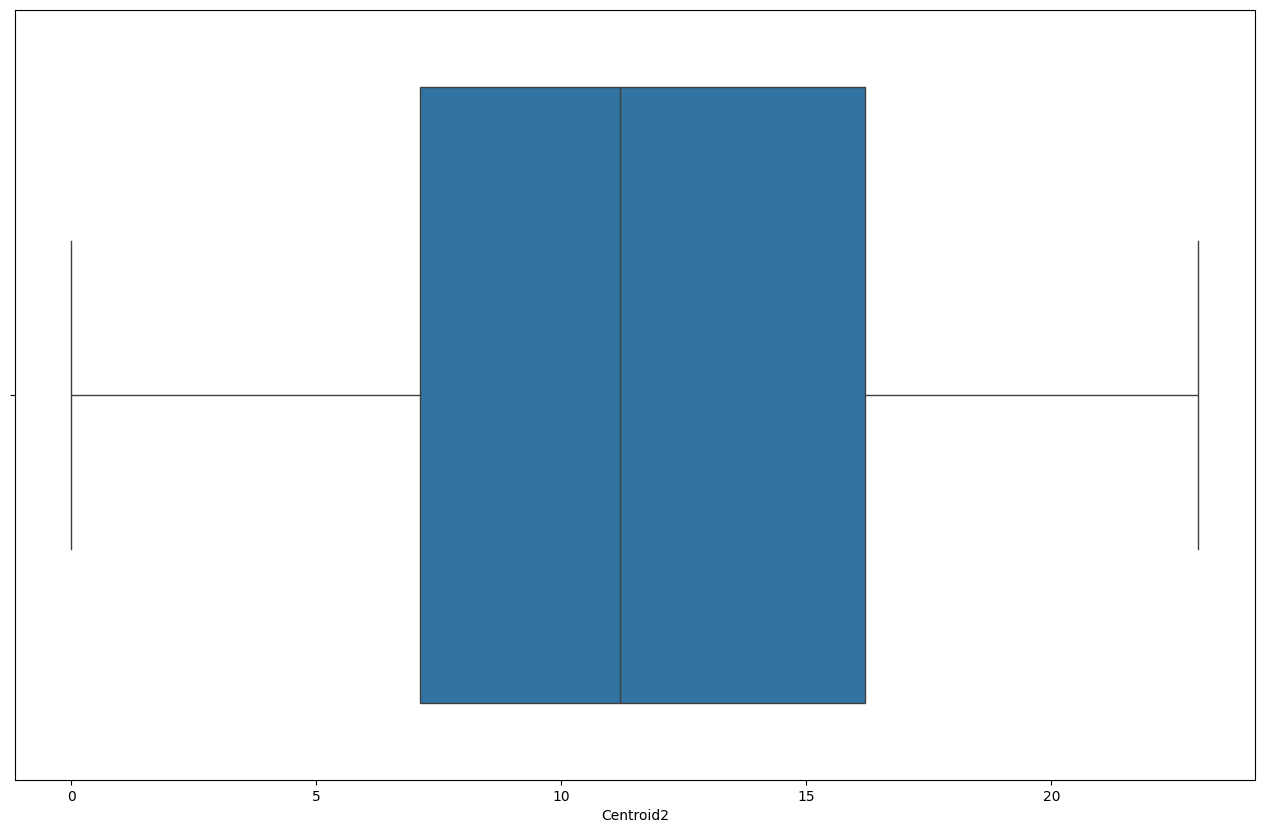

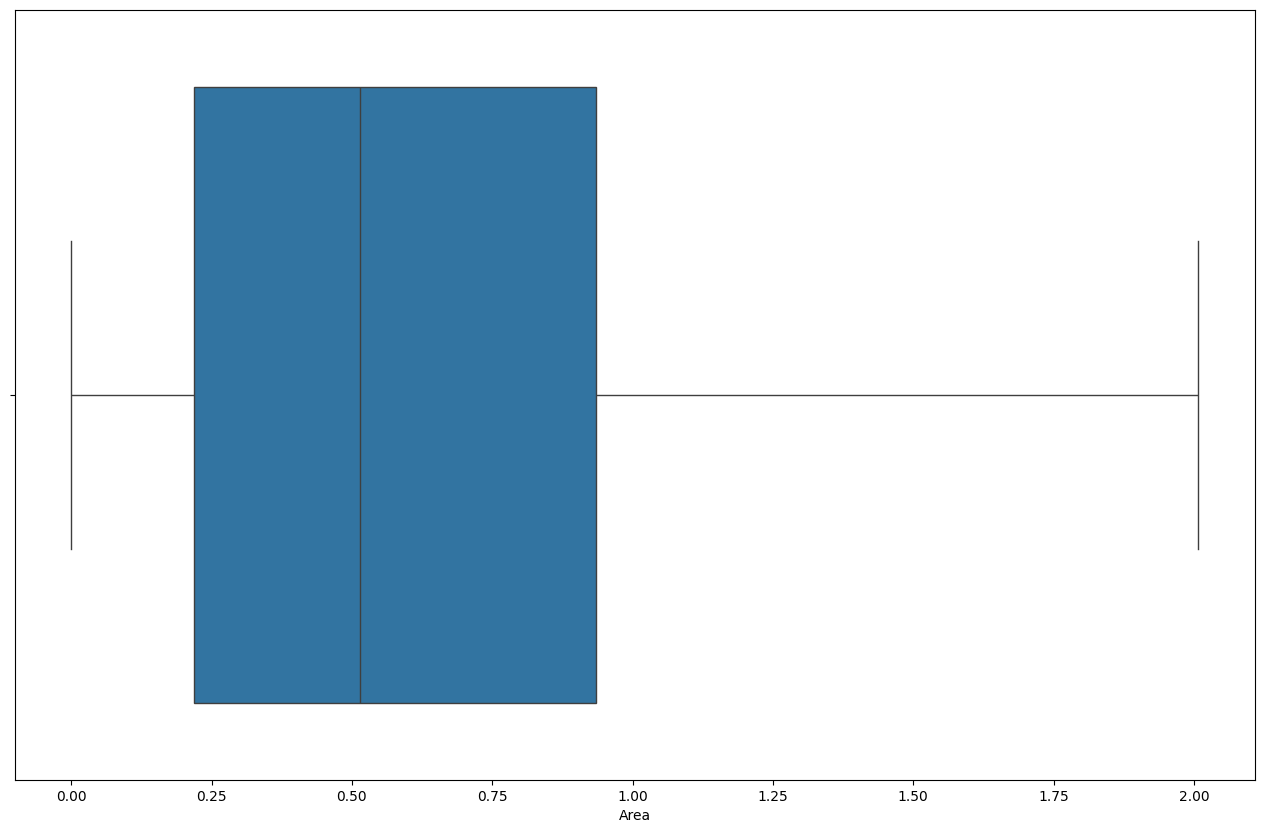

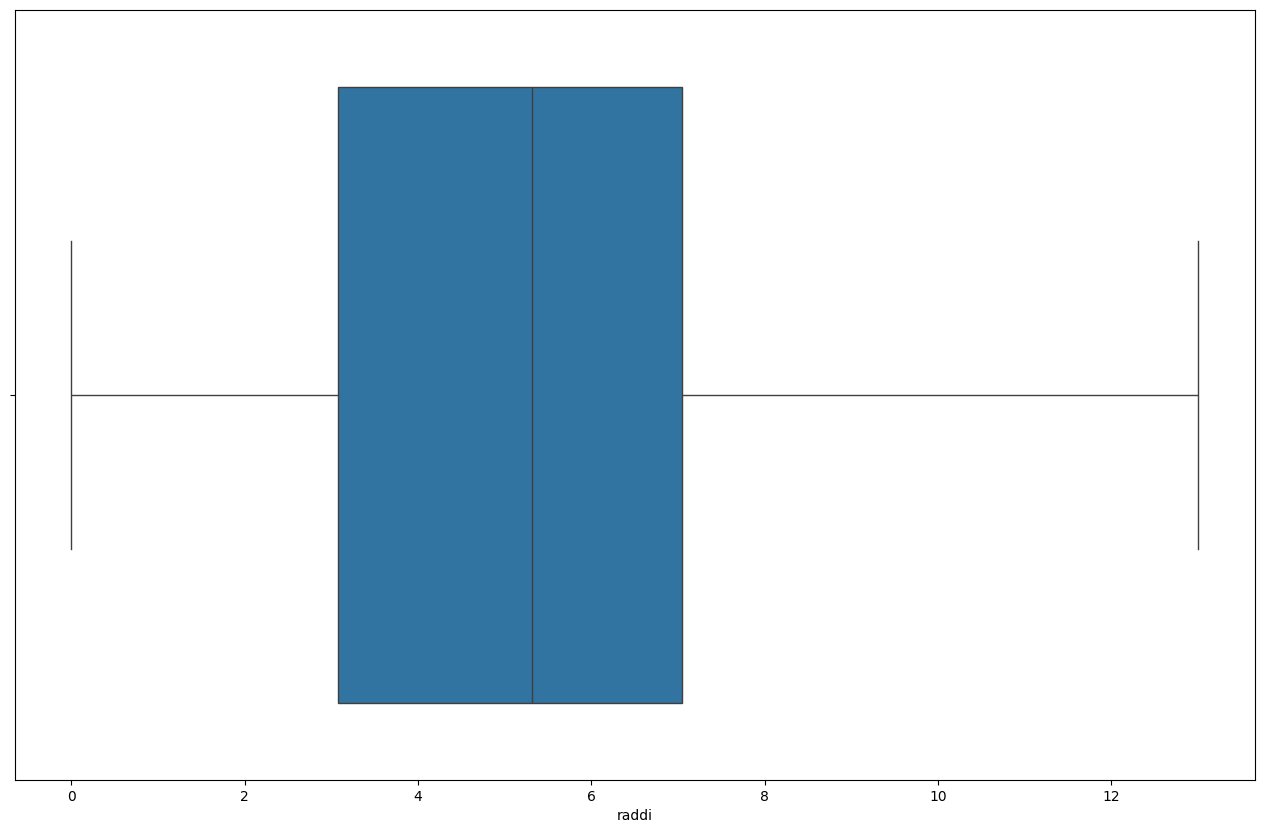

In [83]:
for i in df.select_dtypes(include="number" or 'numeric').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [84]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [85]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,...,2.97,1.3400,1.6100,0.6830,0.19500,3.63,12.10,1.310,7.99,6
1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,...,5.47,1.5200,1.5200,1.0100,0.21500,6.01,20.60,0.765,7.99,6
2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,...,5.96,1.6300,1.3800,1.1100,0.18200,6.55,11.50,0.953,7.99,6
3,10.10,17.9,7.29,11.10,0.9457,6.30,9.94,21.9,8.81,10.70,...,8.88,2.0400,2.1200,0.7150,0.37100,10.30,12.00,2.008,7.99,6
4,6.27,20.2,8.18,10.70,0.9457,3.97,2.58,21.4,10.20,1.22,...,10.20,4.2225,2.4185,2.0405,0.44795,14.00,9.55,2.008,7.99,6


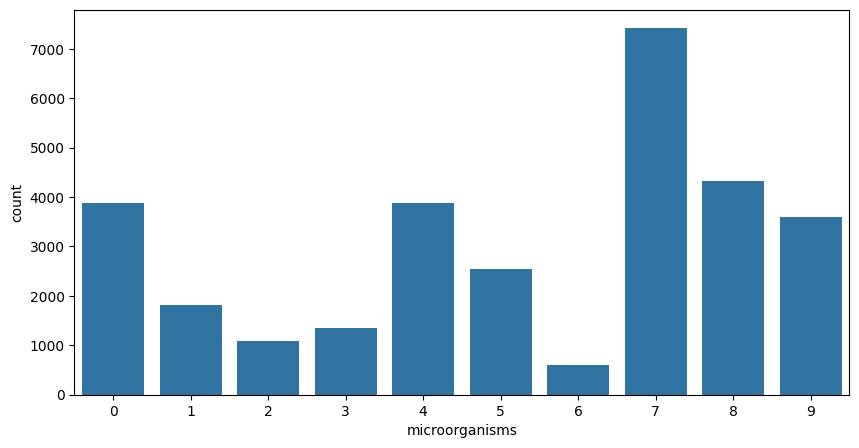

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(x="microorganisms",data=df)
plt.show()

In [87]:
## resampling
from sklearn.utils import resample
df_0=df[df['microorganisms']==0]
df_1=df[df['microorganisms']==1]
df_2=df[df['microorganisms']==2]
df_3=df[df['microorganisms']==3]
df_4=df[df['microorganisms']==4]
df_5=df[df['microorganisms']==5]
df_6=df[df['microorganisms']==6]
df_7=df[df['microorganisms']==7]
df_8=df[df['microorganisms']==8]
df_9=df[df['microorganisms']==9]

## seperate the original dataset two seperate dataframe

df0_sam=resample(df_0,n_samples=7000)
df1_sam=resample(df_1,n_samples=7000)
df2_sam=resample(df_2,n_samples=7000)
df3_sam=resample(df_3,n_samples=7000)
df4_sam=resample(df_4,n_samples=7000)
df5_sam=resample(df_5,n_samples=7000)
df6_sam=resample(df_6,n_samples=7000)
df7_sam=resample(df_7,n_samples=7000)
df8_sam=resample(df_8,n_samples=7000)
df9_sam=resample(df_9,n_samples=7000)

df=pd.concat([df0_sam,df1_sam,df2_sam,df3_sam,df4_sam,df5_sam,df6_sam,df7_sam,df8_sam,df9_sam])
df=df.sample(frac=1,ignore_index=True)

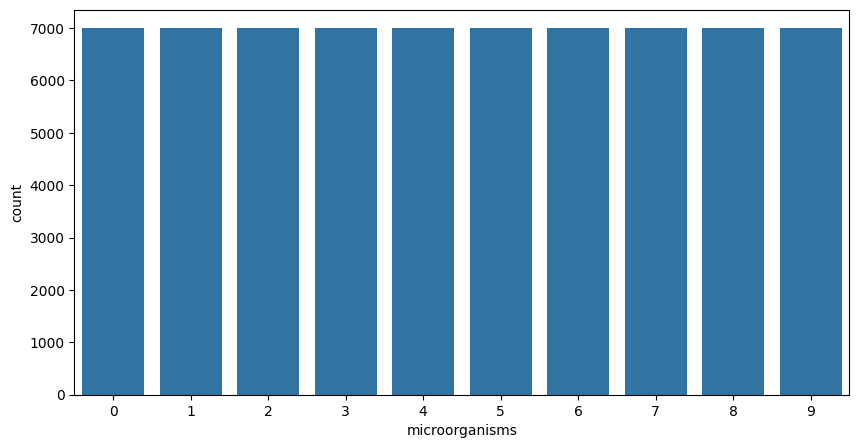

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(x="microorganisms",data=df)
plt.show()


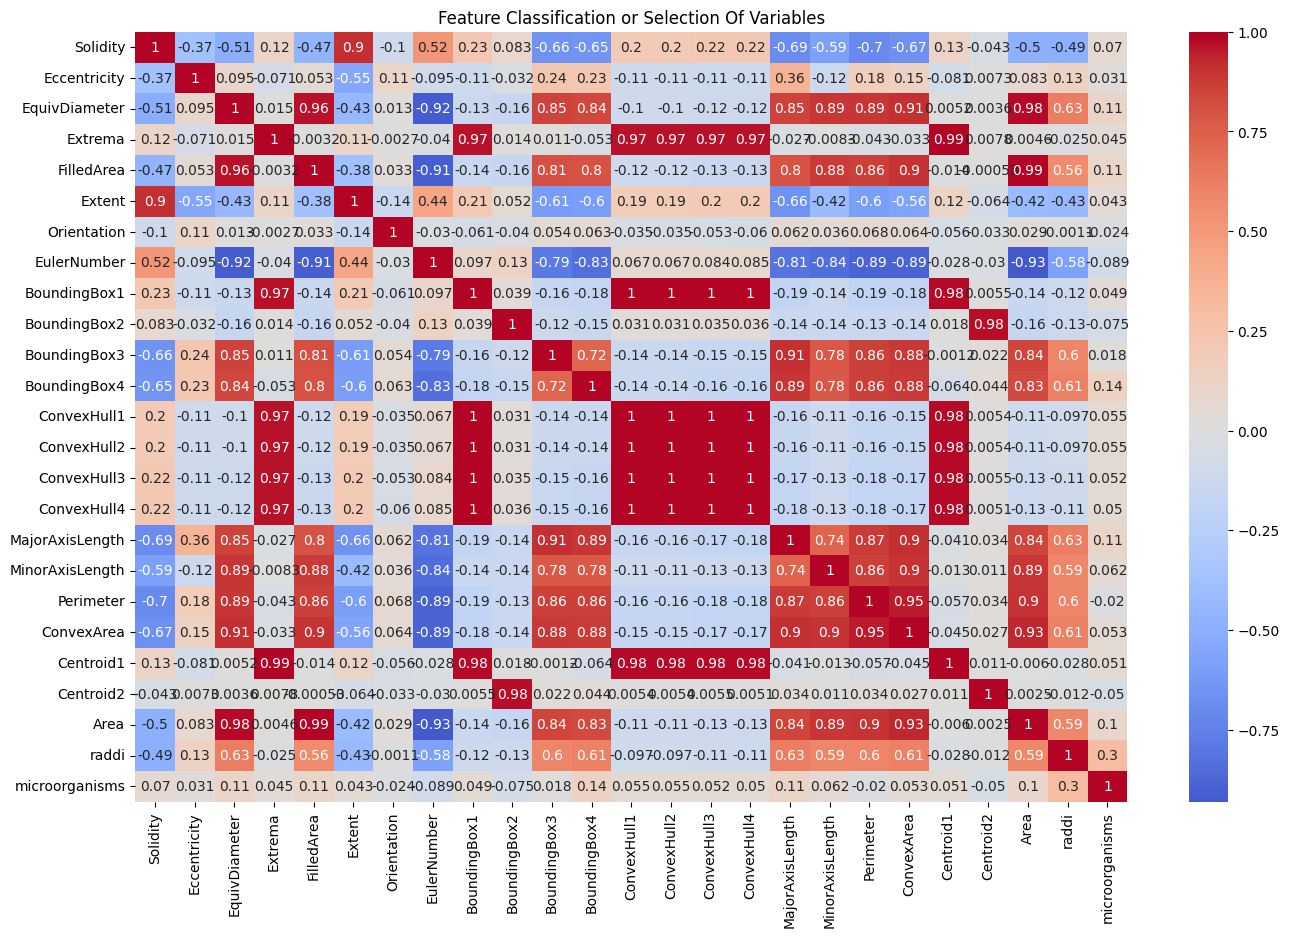

Unique feature with correlation Above 0.98: {'ConvexHull3', 'FilledArea', 'ConvexHull1', 'Extrema', 'ConvexHull2', 'BoundingBox1', 'Area', 'Centroid1', 'ConvexHull4'}


In [89]:
corr_matrix=df.corr()
## Plot the heatmap
plt.rcParams["figure.figsize"]=[16,10]
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",center=0)
plt.title("Feature Classification or Selection Of Variables")
plt.show()
threshold=0.98

## identify pairs of features with correlation above the threshold
high_corr_feat=[(feature, other_feature)
               for feature in corr_matrix.columns
               for other_feature in corr_matrix.columns
               if feature !=other_feature and abs(corr_matrix.loc[feature,other_feature]) > threshold]
high_corr_set=set([item for sublist in high_corr_feat for item in sublist])
print(f"Unique feature with correlation Above {threshold}: {high_corr_set}")

In [90]:
df2=df[['ConvexHull3', 'FilledArea', 'ConvexHull1', 'Extrema', 'ConvexHull2', 'BoundingBox1', 'Area', 'Centroid1', 'ConvexHull4','microorganisms']]

In [91]:
X=df2.drop(["microorganisms"], axis=1)
y=df2[["microorganisms"]]


In [92]:
X.shape

(70000, 9)

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression

In [95]:
from sklearn.pipeline import Pipeline
log=Pipeline([("Scaler",StandardScaler()),("Regression",DecisionTreeRegressor())])
## best parameters:{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}



In [96]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=1)

In [97]:
log.fit(xtrain,ytrain)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', DecisionTreeRegressor())])

In [98]:
pred1=log.predict(xtest)
pred1

array([5., 9., 8., ..., 4., 0., 9.])

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1437
           1       1.00      1.00      1.00      1399
           2       1.00      1.00      1.00      1383
           3       1.00      1.00      1.00      1363
           4       1.00      1.00      1.00      1435
           5       1.00      1.00      1.00      1399
           6       1.00      1.00      1.00      1380
           7       1.00      0.97      0.98      1435
           8       0.99      1.00      1.00      1340
           9       0.99      1.00      1.00      1429

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000



In [100]:
df2['microorganisms'].unique()

array([7, 6, 9, 1, 8, 4, 2, 0, 5, 3])

In [101]:
from sklearn.tree import DecisionTreeRegressor

<Axes: >

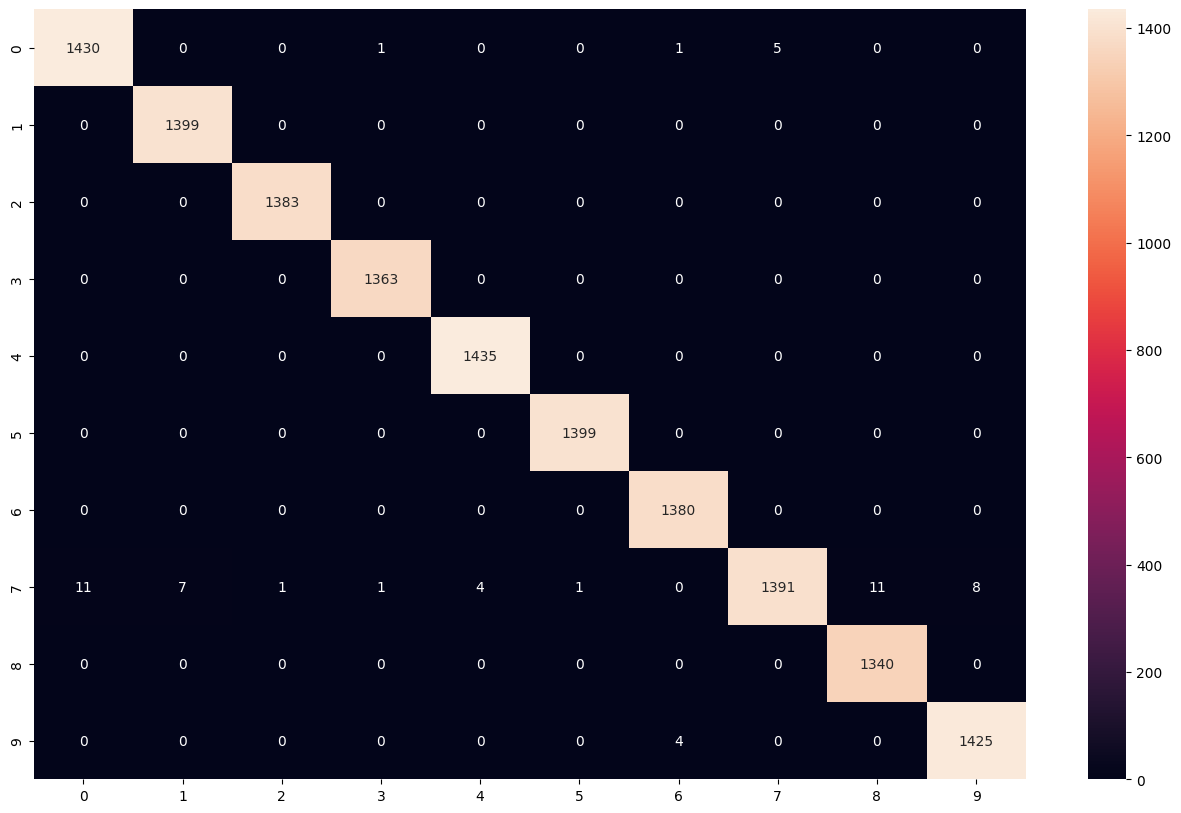

In [104]:
cm=confusion_matrix(ytest,pred1)
sns.heatmap(cm,annot=True,fmt="0.9g")

In [ ]:
xtest.shape

(14000, 9)

In [ ]:
ytest

,microorganisms
6670,0
49567,1
50796,8
22310,8
54037,4
...,...
35736,9
45283,4
1541,2
51612,8


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize TPOT
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)

# Train the model
tpot.fit(X_train, y_train)

# Evaluate the model
print(tpot.score(X_test, y_test))

# Export the model pipeline
tpot.export('algo.py')


c:\Users\DON CONCEPT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 1/300 [00:01<09:46,  1.96s/pipeline]

In [109]:
xtest.head()

,ConvexHull3,FilledArea,ConvexHull1,Extrema,ConvexHull2,BoundingBox1,Area,Centroid1,ConvexHull4
6670,7.950,0.0107,8.030,8.030,8.030,7.860,0.027,7.76,7.880
49567,0.247,0.5370,0.518,0.647,0.518,0.247,1.130,1.09,0.276
50796,17.900,0.2260,17.700,18.800,17.700,17.900,0.560,19.80,17.900
22310,15.200,0.9457,16.300,16.300,16.300,14.800,2.008,18.00,14.800
54037,2.090,0.1950,2.290,3.600,2.290,2.020,0.468,2.37,2.050
